# Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashion-product-images-dataset


In [ ]:
import pandas as pd
import os

csv_path = os.path.join(path, "fashion-dataset/styles.csv")

# Confirm file exists
if os.path.exists(csv_path):
    # Handle potential parsing errors by skipping bad lines
    df = pd.read_csv(csv_path, on_bad_lines='skip', engine='python')
    print(df.head())
else:
    print("styles.csv not found at:", csv_path)

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
import os

image_folder = os.path.join(path, "fashion-dataset/images")

if os.path.exists(image_folder):
    print("Images folder found.")
    print("Example files:", os.listdir(image_folder)[:5])
else:
    print("Images folder not found.")

Images folder found.
Example files: ['31973.jpg', '30778.jpg', '19812.jpg', '22735.jpg', '38246.jpg']


# EDA

In [ ]:
import pandas as pd
styles_path=os.path.join(path, "fashion-dataset/styles.csv")
df = pd.read_csv(styles_path,on_bad_lines='skip', engine='python')
print("Shape:", df.shape)
df.head()

Shape: (44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


**Checking the missing values**

In [ ]:
# Total missing values
missing = df.isnull().sum()
missing[missing > 0]

,0
baseColour,15
season,21
year,1
usage,317
productDisplayName,7


In [ ]:
# Drop rows with missing values in essential columns
df.dropna(subset=["id", "gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"], inplace=True)

In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 44079 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44079 non-null  int64  
 1   gender              44079 non-null  object 
 2   masterCategory      44079 non-null  object 
 3   subCategory         44079 non-null  object 
 4   articleType         44079 non-null  object 
 5   baseColour          44079 non-null  object 
 6   season              44079 non-null  object 
 7   year                44079 non-null  float64
 8   usage               44079 non-null  object 
 9   productDisplayName  44077 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44079.000000,44079,44079,44079,44079,44079,44079,44079.000000,44079,44077
unique,NaN,5,7,45,142,46,4,NaN,8,30806
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings
freq,NaN,22109,21366,15387,7066,9700,21442,NaN,34399,82
mean,29551.181810,NaN,NaN,NaN,NaN,NaN,NaN,2012.782005,NaN,NaN
std,16974.085404,NaN,NaN,NaN,NaN,NaN,NaN,2.108078,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14722.500000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28492.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44406.500000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


In [ ]:
columns_to_check = ["gender", "masterCategory", "subCategory", "articleType", "baseColour", "season", "usage"]

for col in columns_to_check:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")

gender: 5 unique values
gender
Men       22109
Women     18359
Unisex     2126
Boys        830
Girls       655
Name: count, dtype: int64 

masterCategory: 7 unique values
masterCategory
Apparel          21366
Accessories      11246
Footwear          9197
Personal Care     2139
Free Items         105
Name: count, dtype: int64 

subCategory: 45 unique values
subCategory
Topwear       15387
Shoes          7323
Bags           3055
Bottomwear     2686
Watches        2542
Name: count, dtype: int64 

articleType: 142 unique values
articleType
Tshirts         7066
Shirts          3214
Casual Shoes    2845
Watches         2542
Sports Shoes    2016
Name: count, dtype: int64 

baseColour: 46 unique values
baseColour
Black    9700
White    5497
Blue     4907
Brown    3441
Grey     2735
Name: count, dtype: int64 

season: 4 unique values
season
Summer    21442
Fall      11414
Winter     8511
Spring     2712
Name: count, dtype: int64 

usage: 8 unique values
usage
Casual          34399
Sports       

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


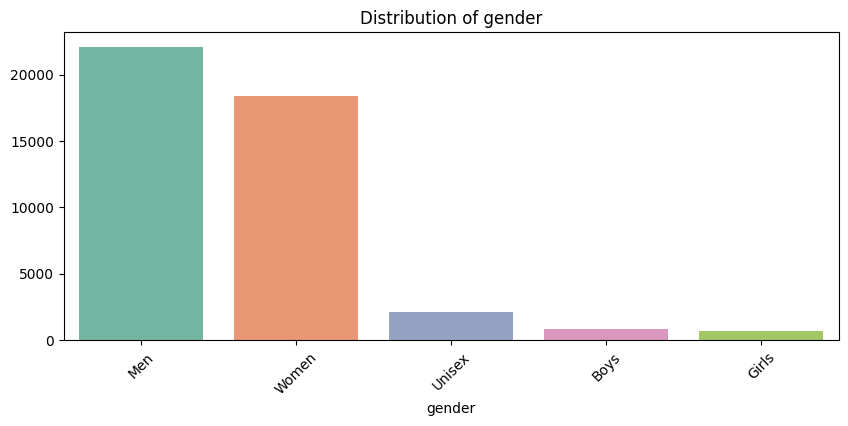

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


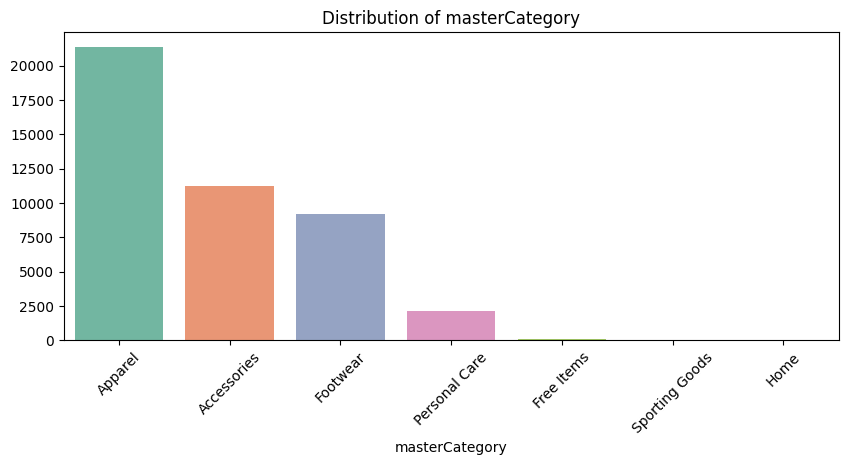

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


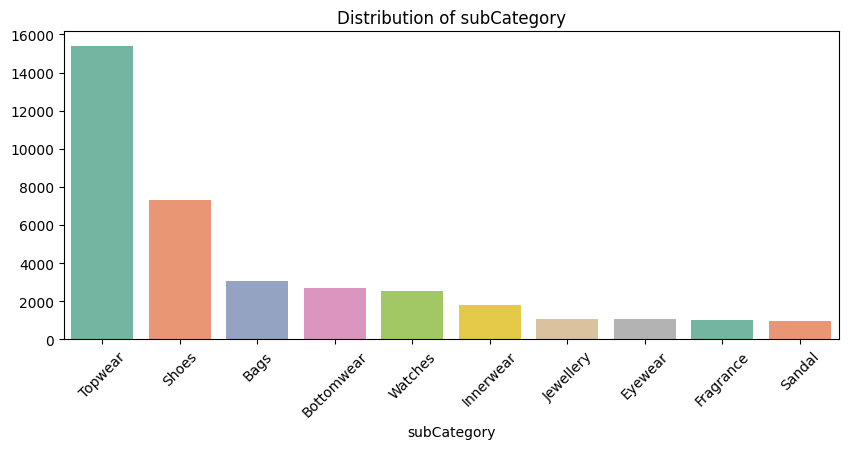

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


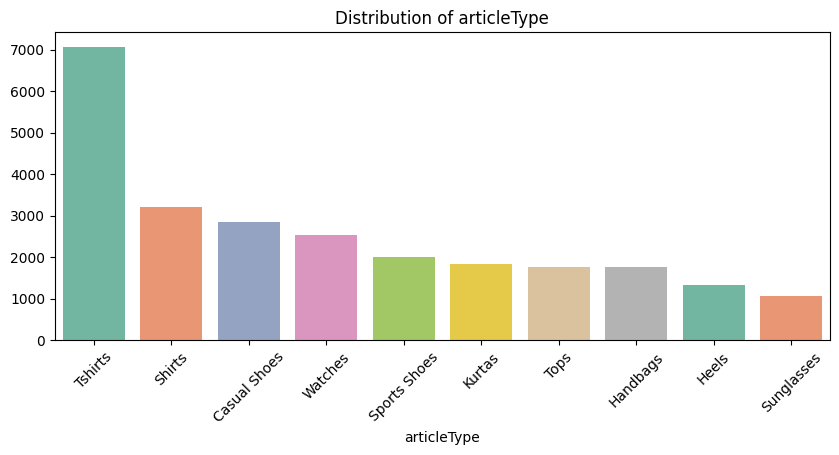

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


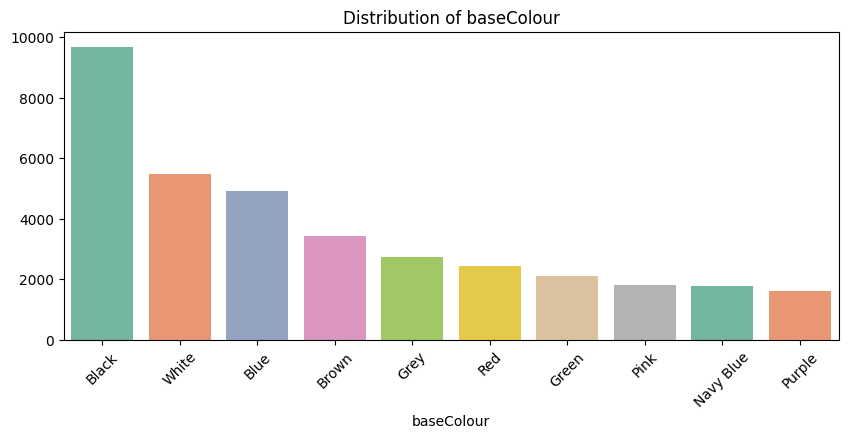

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


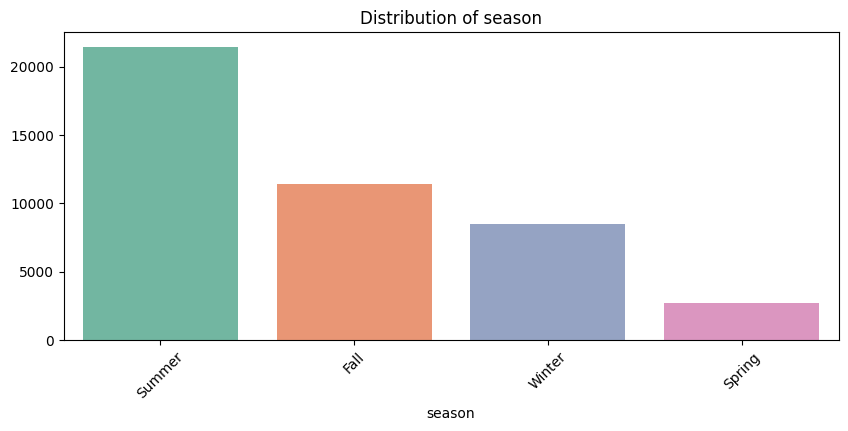

/tmp/ipython-input-30-3422929828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')


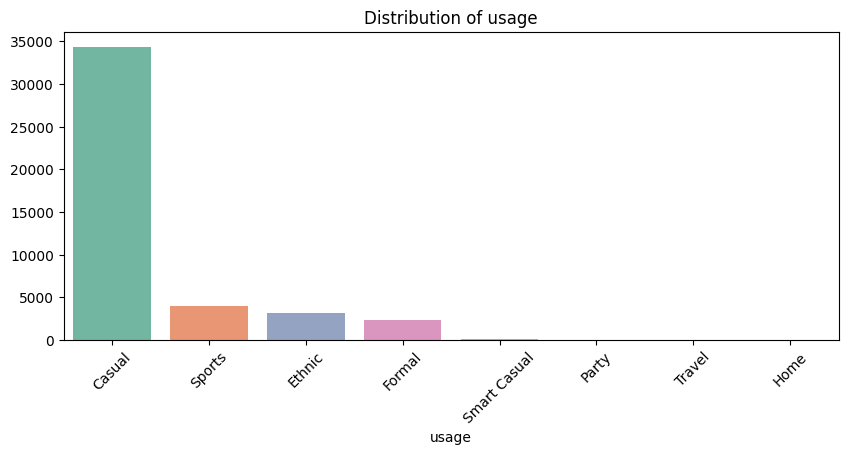

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count(col, top_n=None, figsize=(10, 4)):
    plt.figure(figsize=figsize)
    if top_n:
        data = df[col].value_counts().nlargest(top_n)
    else:
        data = df[col].value_counts()
    sns.barplot(x=data.index, y=data.values, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

plot_count("gender")
plot_count("masterCategory")
plot_count("subCategory", top_n=10)
plot_count("articleType", top_n=10)
plot_count("baseColour", top_n=10)
plot_count("season")
plot_count("usage")

In [ ]:
pd.crosstab(df['gender'], df['masterCategory'])

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
gender,,,,,,,
Boys,17,759,54,0,0,0,0
Girls,28,567,60,0,0,0,0
Men,4402,11341,5742,53,0,571,0
Unisex,1479,85,512,9,1,15,25
Women,5320,8614,2829,43,0,1553,0


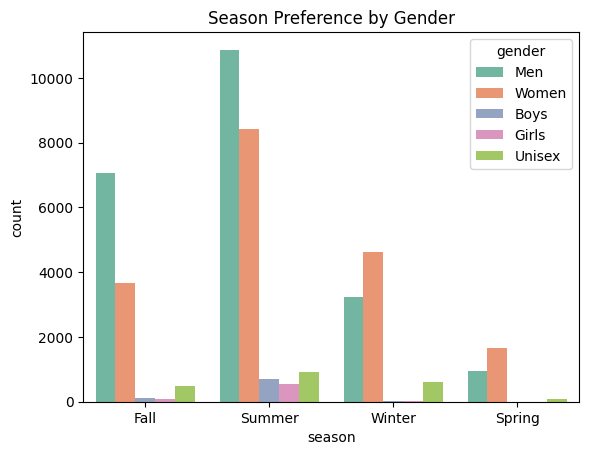

In [ ]:
sns.countplot(data=df, x="season", hue="gender", palette="Set2")
plt.title("Season Preference by Gender")
plt.show()

In [ ]:
import os
image_dir= os.path.join(path, "fashion-dataset/images")

df['image_path'] = df['id'].apply(lambda x: os.path.join(image_dir, str(int(x)) + ".jpg"))
df['image_exists'] = df['image_path'].apply(os.path.exists)

# Check how many images are missing
missing_images = df[~df['image_exists']]
print(f"Missing images: {len(missing_images)}")

# Drop rows with missing images
df = df[df['image_exists']]

Missing images: 5


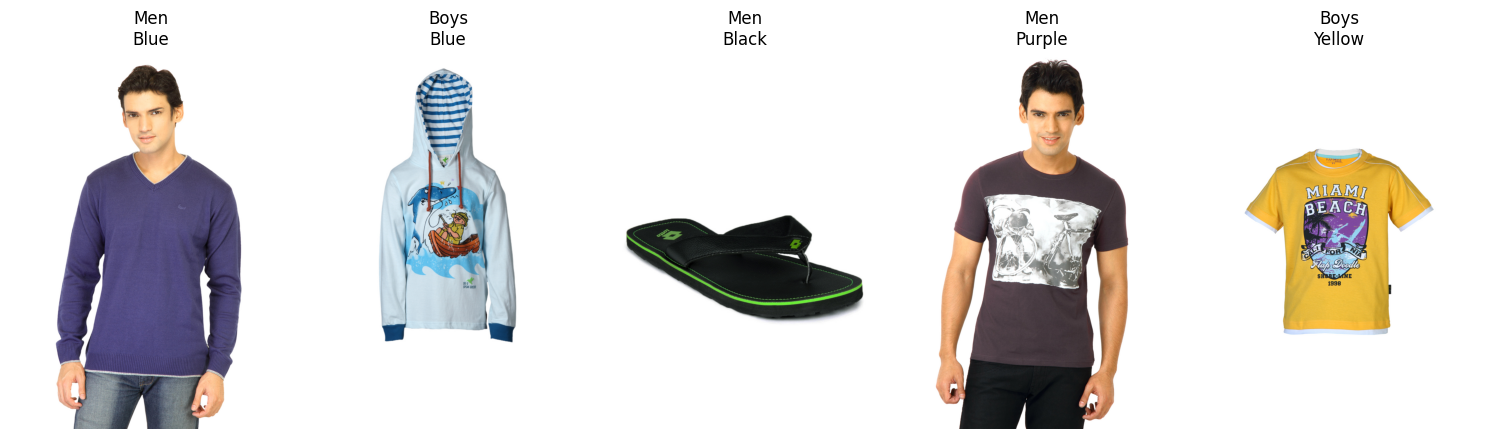

In [ ]:
from PIL import Image

def show_images(df_sample):
    plt.figure(figsize=(15, 6))
    for i, row in enumerate(df_sample.itertuples(), 1):
        img = Image.open(row.image_path)
        plt.subplot(1, len(df_sample), i)
        plt.imshow(img)
        plt.title(f"{row.gender}\n{row.baseColour}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Show 5 random sample images
show_images(df.sample(5))

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ["gender", "masterCategory", "season", "baseColour"]:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    encoders[col] = le

df[["gender", "gender_encoded", "season", "season_encoded"]].head()

,gender,gender_encoded,season,season_encoded
0,Men,2,Fall,0
1,Men,2,Summer,2
2,Women,4,Winter,3
3,Men,2,Fall,0
4,Men,2,Summer,2


# Data Preprocessing

In [ ]:
# Keep only required columns
df = df[['image_path', 'gender', 'baseColour', 'season', 'masterCategory']]
df = df.dropna()

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
label_columns = ['gender', 'baseColour', 'season', 'masterCategory']

for col in label_columns:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
#  Step 3: Train-Validation Split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['gender_enc'])
print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}")

Train size: 35259, Validation size: 8815


# Model Building

In [ ]:
# Step 1: Model Architecture for Multi-Output Classification (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2

# Constants
IMG_SIZE = 128
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Number of classes in each output
num_classes = {
    'gender': df['gender_enc'].nunique(),
    'color': df['baseColour_enc'].nunique(),
    'season': df['season_enc'].nunique(),
    'product': df['masterCategory_enc'].nunique()
}

# Base model
base_model = MobileNetV2(include_top=False, input_shape=INPUT_SHAPE, weights='imagenet')
base_model.trainable = False  # For faster training

# Input layer
inputs = layers.Input(shape=INPUT_SHAPE)

# Base model output
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)

# Output heads
gender_output = layers.Dense(num_classes['gender'], activation='softmax', name='gender')(x)
color_output = layers.Dense(num_classes['color'], activation='softmax', name='color')(x)
season_output = layers.Dense(num_classes['season'], activation='softmax', name='season')(x)
product_output = layers.Dense(num_classes['product'], activation='softmax', name='product')(x)

# Final model
model = Model(inputs=inputs, outputs=[gender_output, color_output, season_output, product_output])

# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'gender': 'sparse_categorical_crossentropy',
        'color': 'sparse_categorical_crossentropy',
        'season': 'sparse_categorical_crossentropy',
        'product': 'sparse_categorical_crossentropy'
    },
    metrics={
        'gender': 'accuracy',
        'color': 'accuracy',
        'season': 'accuracy',
        'product': 'accuracy'
    }
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_1… │ (None, 4, 4,      │  2,257,984 │ input_layer_1[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1280)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender (Dense)      │ (None, 5)         │      6,405 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (Dense)       │ (None, 46)        │     58,926 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ season (Dense)      │ (None, 4)         │      5,124 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ product (Dense)     │ (None, 7)         │      8,967 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,337,406 (8.92 MB)

 Trainable params: 79,422 (310.24 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
def to_tf_dataset(df, batch_size=64):
    def decode(image_path, gender, color, season, product):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
        image = tf.cast(image, tf.float32) / 255.0
        return image, {
            'gender': gender,
            'color': color,
            'season': season,
            'product': product
        }

    dataset = tf.data.Dataset.from_tensor_slices((
        df['image_path'].values,
        df['gender_enc'].values,
        df['baseColour_enc'].values,
        df['season_enc'].values,
        df['masterCategory_enc'].values
    ))

    dataset = dataset.map(decode, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=2048).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

In [ ]:
train_ds = to_tf_dataset(train_df,batch_size=64)
val_ds = to_tf_dataset(val_df,batch_size=64)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - color_accuracy: 0.3202 - color_loss: 2.5174 - gender_accuracy: 0.7309 - gender_loss: 0.7182 - loss: 4.5592 - product_accuracy: 0.9050 - product_loss: 0.2988 - season_accuracy: 0.5695 - season_loss: 1.0247

551/551 ━━━━━━━━━━━━━━━━━━━━ 680s 1s/step - color_accuracy: 0.3203 - color_loss: 2.5168 - gender_accuracy: 0.7310 - gender_loss: 0.7180 - loss: 4.5578 - product_accuracy: 0.9051 - product_loss: 0.2985 - season_accuracy: 0.5695 - season_loss: 1.0245 - val_color_accuracy: 0.4900 - val_color_loss: 1.7775 - val_gender_accuracy: 0.8484 - val_gender_loss: 0.4147 - val_loss: 3.0520 - val_product_accuracy: 0.9828 - val_product_loss: 0.0688 - val_season_accuracy: 0.6592 - val_season_loss: 0.7914
Epoch 2/15
550/551 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - color_accuracy: 0.4725 - color_loss: 1.7887 - gender_accuracy: 0.8332 - gender_loss: 0.4421 - loss: 3.1074 - product_accuracy: 0.9798 - product_loss: 0.0763 - season_accuracy: 0.6475 - season_loss: 0.8004

551/551 ━━━━━━━━━━━━━━━━━━━━ 600s 1s/step - color_accuracy: 0.4725 - color_loss: 1.7887 - gender_accuracy: 0.8333 - gender_loss: 0.4421 - loss: 3.1073 - product_accuracy: 0.9798 - product_loss: 0.0762 - season_accuracy: 0.6475 - season_loss: 0.8003 - val_color_accuracy: 0.5106 - val_color_loss: 1.6981 - val_gender_accuracy: 0.8525 - val_gender_loss: 0.4019 - val_loss: 2.9357 - val_product_accuracy: 0.9855 - val_product_loss: 0.0595 - val_season_accuracy: 0.6664 - val_season_loss: 0.7768
Epoch 3/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - color_accuracy: 0.4951 - color_loss: 1.6786 - gender_accuracy: 0.8449 - gender_loss: 0.4144 - loss: 2.9419 - product_accuracy: 0.9824 - product_loss: 0.0615 - season_accuracy: 0.6550 - season_loss: 0.7873

551/551 ━━━━━━━━━━━━━━━━━━━━ 623s 1s/step - color_accuracy: 0.4951 - color_loss: 1.6786 - gender_accuracy: 0.8449 - gender_loss: 0.4144 - loss: 2.9419 - product_accuracy: 0.9824 - product_loss: 0.0615 - season_accuracy: 0.6550 - season_loss: 0.7873 - val_color_accuracy: 0.5204 - val_color_loss: 1.6862 - val_gender_accuracy: 0.8579 - val_gender_loss: 0.3830 - val_loss: 2.9012 - val_product_accuracy: 0.9868 - val_product_loss: 0.0581 - val_season_accuracy: 0.6549 - val_season_loss: 0.7739
Epoch 4/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - color_accuracy: 0.5043 - color_loss: 1.6362 - gender_accuracy: 0.8442 - gender_loss: 0.4063 - loss: 2.8754 - product_accuracy: 0.9863 - product_loss: 0.0537 - season_accuracy: 0.6531 - season_loss: 0.7792 - val_color_accuracy: 0.5204 - val_color_loss: 1.6833 - val_gender_accuracy: 0.8589 - val_gender_loss: 0.3842 - val_loss: 2.9080 - val_product_accuracy: 0.9870 - val_product_loss: 0.0569 - val_season_accuracy: 0.6624 - val_season_loss: 0.7829
Epoch

551/551 ━━━━━━━━━━━━━━━━━━━━ 626s 1s/step - color_accuracy: 0.5086 - color_loss: 1.6025 - gender_accuracy: 0.8471 - gender_loss: 0.4082 - loss: 2.8390 - product_accuracy: 0.9845 - product_loss: 0.0509 - season_accuracy: 0.6567 - season_loss: 0.7773 - val_color_accuracy: 0.5242 - val_color_loss: 1.6695 - val_gender_accuracy: 0.8574 - val_gender_loss: 0.3862 - val_loss: 2.8827 - val_product_accuracy: 0.9872 - val_product_loss: 0.0590 - val_season_accuracy: 0.6642 - val_season_loss: 0.7676
Epoch 6/15
550/551 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - color_accuracy: 0.5165 - color_loss: 1.5822 - gender_accuracy: 0.8482 - gender_loss: 0.4013 - loss: 2.8065 - product_accuracy: 0.9855 - product_loss: 0.0475 - season_accuracy: 0.6578 - season_loss: 0.7755

551/551 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - color_accuracy: 0.5165 - color_loss: 1.5822 - gender_accuracy: 0.8482 - gender_loss: 0.4013 - loss: 2.8065 - product_accuracy: 0.9855 - product_loss: 0.0475 - season_accuracy: 0.6578 - season_loss: 0.7755 - val_color_accuracy: 0.5215 - val_color_loss: 1.6639 - val_gender_accuracy: 0.8592 - val_gender_loss: 0.3840 - val_loss: 2.8653 - val_product_accuracy: 0.9866 - val_product_loss: 0.0577 - val_season_accuracy: 0.6675 - val_season_loss: 0.7592
Epoch 7/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - color_accuracy: 0.5146 - color_loss: 1.5763 - gender_accuracy: 0.8509 - gender_loss: 0.4004 - loss: 2.7936 - product_accuracy: 0.9862 - product_loss: 0.0463 - season_accuracy: 0.6596 - season_loss: 0.7706 - val_color_accuracy: 0.5300 - val_color_loss: 1.6704 - val_gender_accuracy: 0.8623 - val_gender_loss: 0.3769 - val_loss: 2.8790 - val_product_accuracy: 0.9872 - val_product_loss: 0.0577 - val_season_accuracy: 0.6496 - val_season_loss: 0.7737
Epoch

In [ ]:


results = model.evaluate(val_ds)
print("Evaluation Results:")
for i, metric_name in enumerate(model.metrics_names):
  print(f"{metric_name}: {results[i]:.4f}")

138/138 ━━━━━━━━━━━━━━━━━━━━ 123s 652ms/step - color_accuracy: 0.5179 - color_loss: 1.6795 - gender_accuracy: 0.8485 - gender_loss: 0.4011 - loss: 2.9019 - product_accuracy: 0.9854 - product_loss: 0.0565 - season_accuracy: 0.6632 - season_loss: 0.7648
Evaluation Results:
loss: 2.8653
compile_metrics: 0.3843
gender_loss: 1.6631
color_loss: 0.7594
season_loss: 0.0578
product_loss: 0.5215


In [ ]:
model.save("multioutput_model.keras")

In [ ]:
import pickle
for col in label_encoders:
    with open(f"label_encoder_{col}.pkl", "wb") as f:
        pickle.dump(label_encoders[col], f)

# Demo inference

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


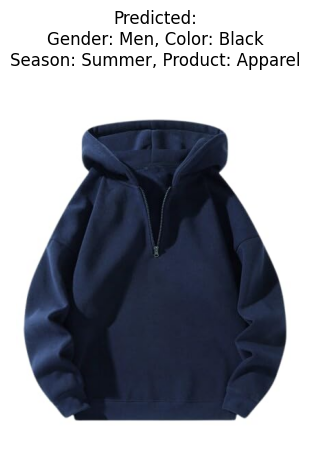

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


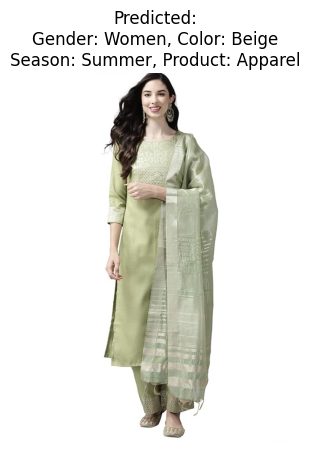

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


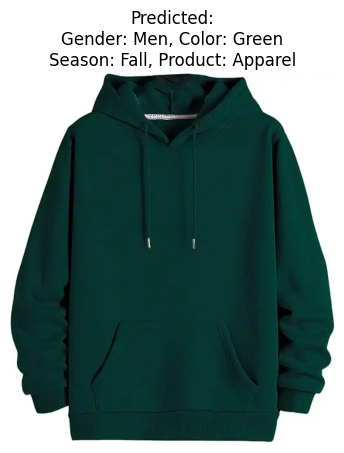

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


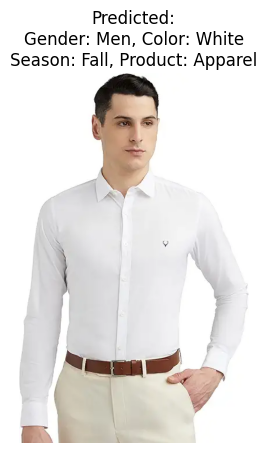

In [ ]:
import tensorflow as tf
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
import pickle

# -------------------- CONFIG --------------------

# Paths
MODEL_PATH = "multioutput_model.keras"
IMG_SIZE = 128

# Load the model
model = tf.keras.models.load_model(MODEL_PATH)

# Load LabelEncoders (assumes saved previously)
label_encoders = {}
for col in ['gender', 'baseColour', 'season', 'masterCategory']:
    with open(f'label_encoder_{col}.pkl', 'rb') as f:
        label_encoders[col] = pickle.load(f)

# Sample Amazon image URLs (fashion products)
image_urls = [
    "https://m.media-amazon.com/images/I/31NcUpqEbaL.jpg",
    "https://m.media-amazon.com/images/I/71hHe9qwy3L._SY879_.jpg",
    "https://m.media-amazon.com/images/I/61+UDWZaflL._AC_UL640_FMwebp_QL65_.jpg",
    "https://m.media-amazon.com/images/I/61idJrfaIRL._AC_UL640_FMwebp_QL65_.jpg",
]

# -------------------- FUNCTIONS --------------------

def fetch_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img

def preprocess_image(img):
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img) / 255.0
    return np.expand_dims(img, axis=0)

def predict_labels(img_tensor):
    preds = model.predict(img_tensor)
    decoded_preds = {
        'gender': label_encoders['gender'].inverse_transform([np.argmax(preds[0])])[0],
        'color': label_encoders['baseColour'].inverse_transform([np.argmax(preds[1])])[0],
        'season': label_encoders['season'].inverse_transform([np.argmax(preds[2])])[0],
        'product': label_encoders['masterCategory'].inverse_transform([np.argmax(preds[3])])[0]
    }
    return decoded_preds

# -------------------- MAIN LOOP --------------------

for url in image_urls:
    img = fetch_image_from_url(url)
    img_tensor = preprocess_image(img)
    predictions = predict_labels(img_tensor)

    # Plot
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"Predicted:\nGender: {predictions['gender']}, Color: {predictions['color']}\n"
        f"Season: {predictions['season']}, Product: {predictions['product']}"
    )
    plt.show()